In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.tree import export_graphviz

In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pydotplus

In [4]:
#вывод первых строчек данных
df = pd.read_excel('dataset_credit.xlsx')
df.head()

,ID,ЗП,ПОЛ,ТИП ЗАЙМА,СЕМЕЙНЫЙ СТАТУС,КОЛИЧЕСТВО ДЕТЕЙ,ВОЗРАСТ,EXT-1,EXT-2,EXT-3,TARGET
0,0,76678,m,Cash loans,1,1,37,0.962376,0.410190,0.565053,0
1,1,37034,f,Revolving loans,0,5,32,0.963894,0.116210,0.027707,1
2,2,16193,m,Cash loans,0,2,29,0.066065,0.312960,0.739708,1
3,3,29286,f,Cash loans,1,2,36,0.081143,0.918573,0.779822,0
4,4,29470,f,Cash loans,1,2,41,0.955397,0.590802,0.325544,1


In [5]:
#приводим gender к числовому виду (1-f, 0-m)
df['ПОЛ'] = df['ПОЛ'].factorize()[0]
df['ТИП ЗАЙМА'] = df['ТИП ЗАЙМА'].factorize()[0]
df.head()

,ID,ЗП,ПОЛ,ТИП ЗАЙМА,СЕМЕЙНЫЙ СТАТУС,КОЛИЧЕСТВО ДЕТЕЙ,ВОЗРАСТ,EXT-1,EXT-2,EXT-3,TARGET
0,0,76678,0,0,1,1,37,0.962376,0.410190,0.565053,0
1,1,37034,1,1,0,5,32,0.963894,0.116210,0.027707,1
2,2,16193,0,0,0,2,29,0.066065,0.312960,0.739708,1
3,3,29286,1,0,1,2,36,0.081143,0.918573,0.779822,0
4,4,29470,1,0,1,2,41,0.955397,0.590802,0.325544,1


In [114]:
#формируем матрицу признаков и результирующий столбец
x = df.drop('TARGET', axis = 1)
y = df['TARGET']

In [115]:
#разбиваем наш dataset на обучающую(80%) и тестовую(20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#создаем дерево решений(классификатор)
tree = DecisionTreeClassifier(max_depth = 11)

#обучаем его
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11)

In [116]:
prediction = tree.predict(x_test)

In [117]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
from sklearn.datasets import load_iris

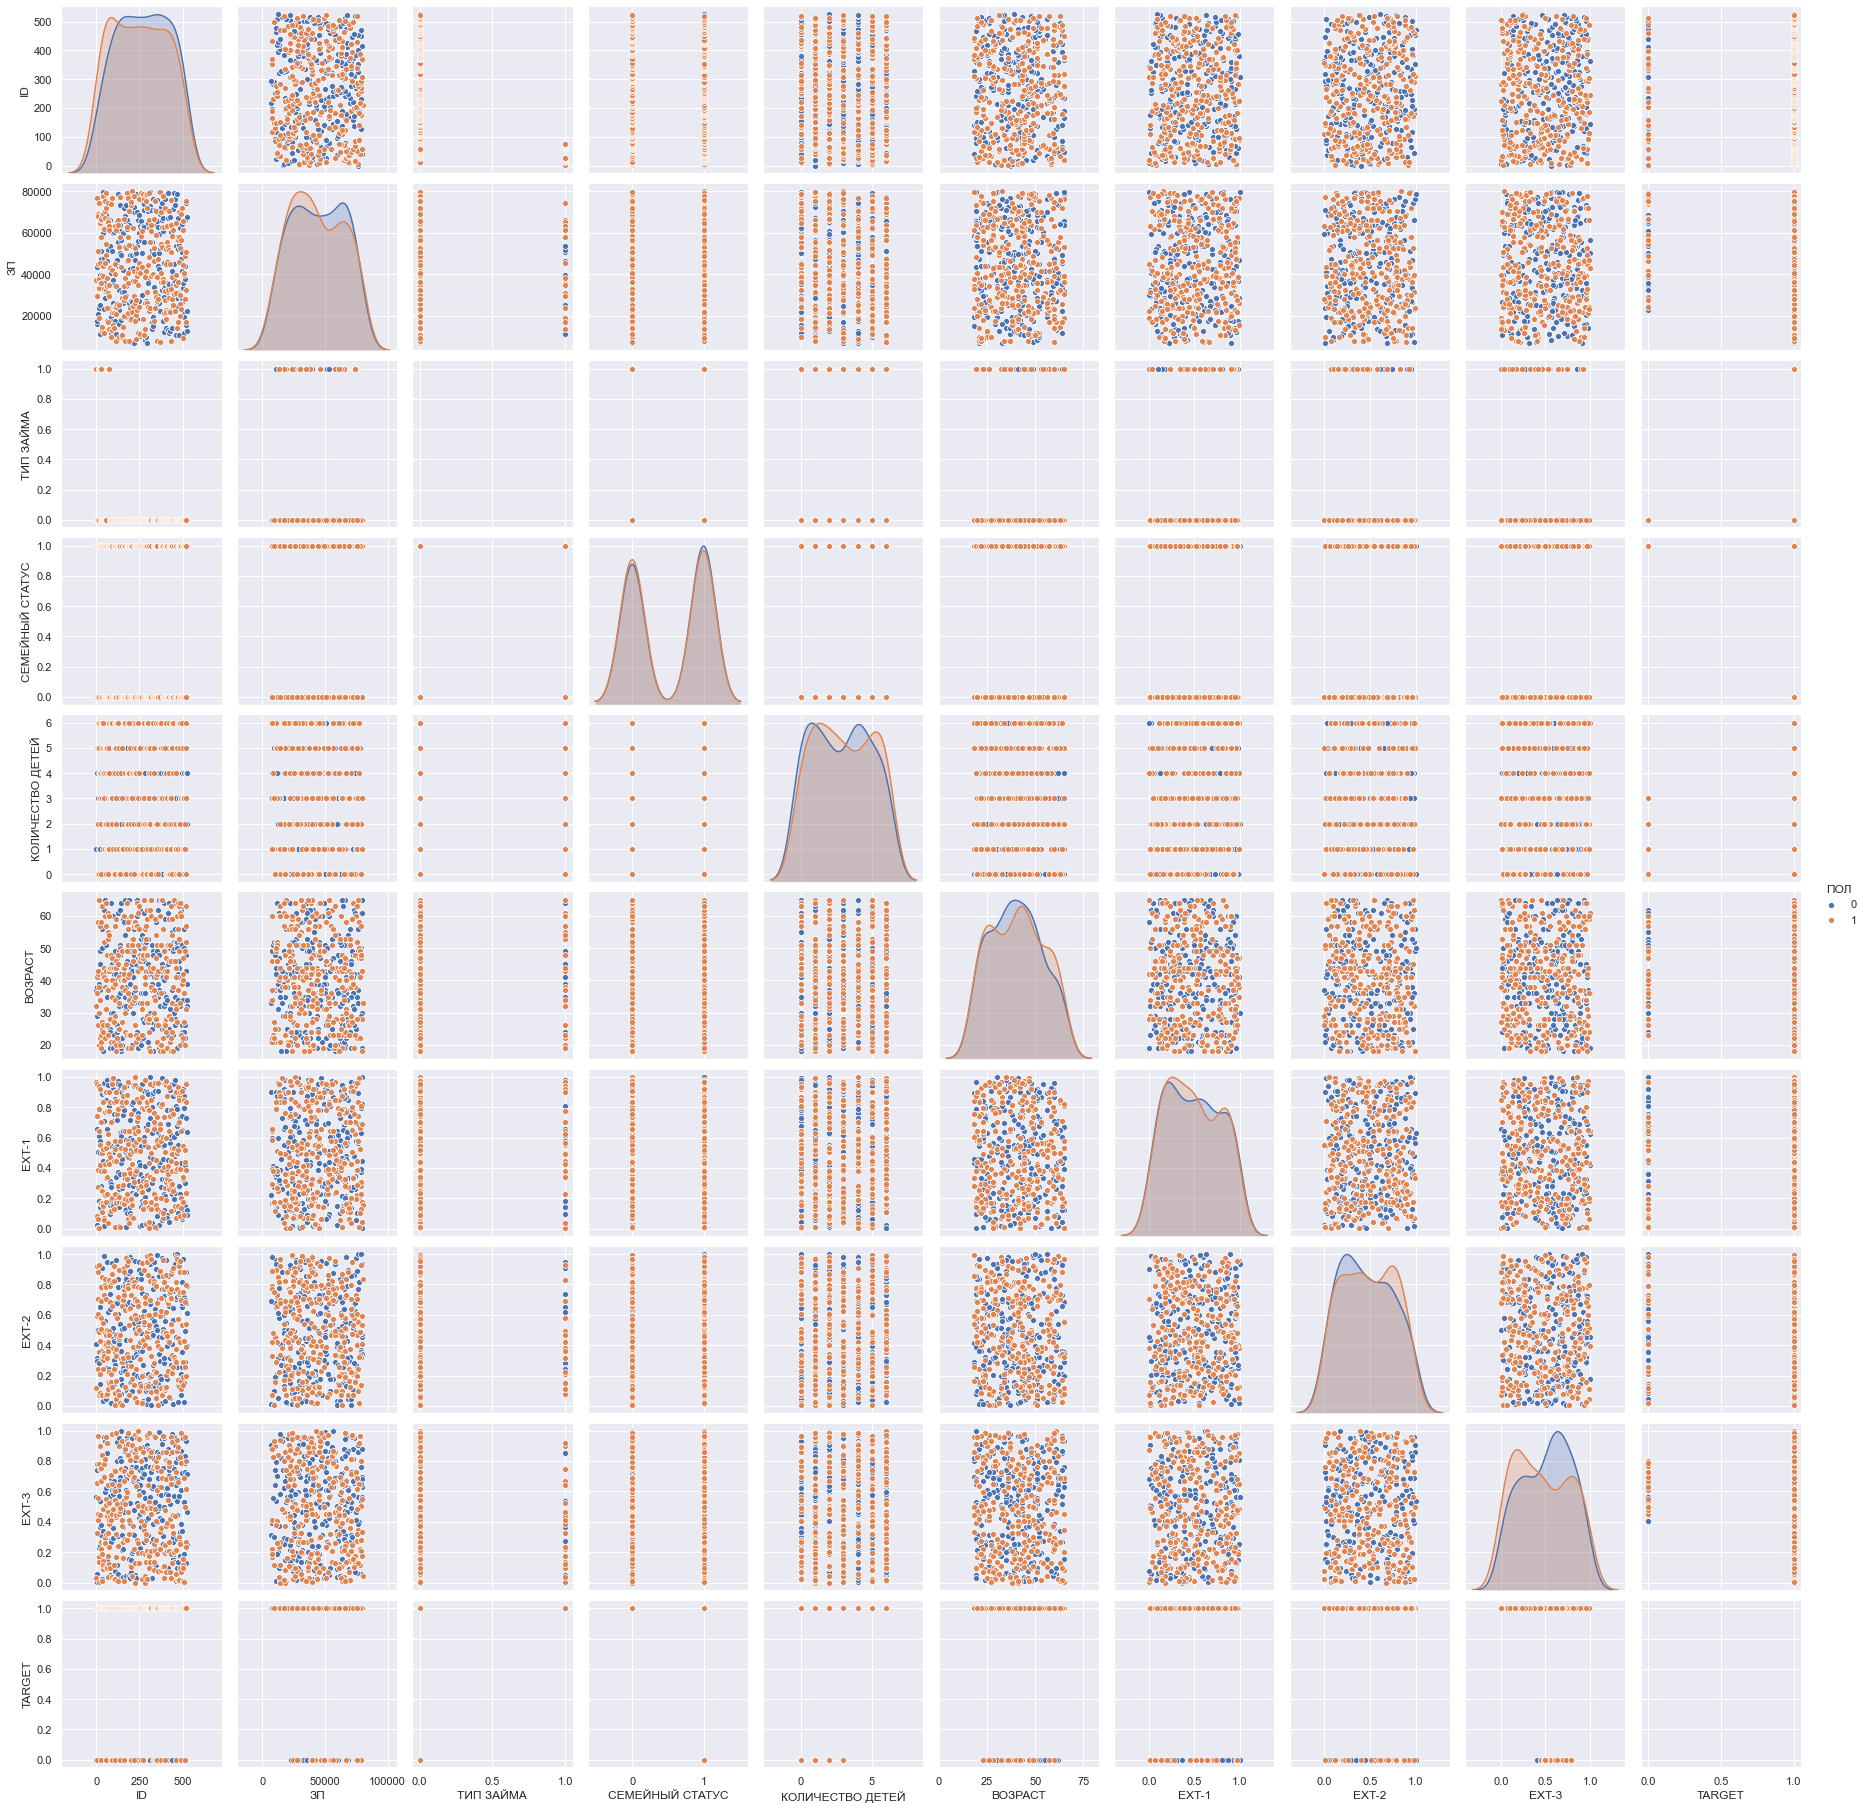

In [10]:
sns.pairplot(df, hue="ПОЛ")

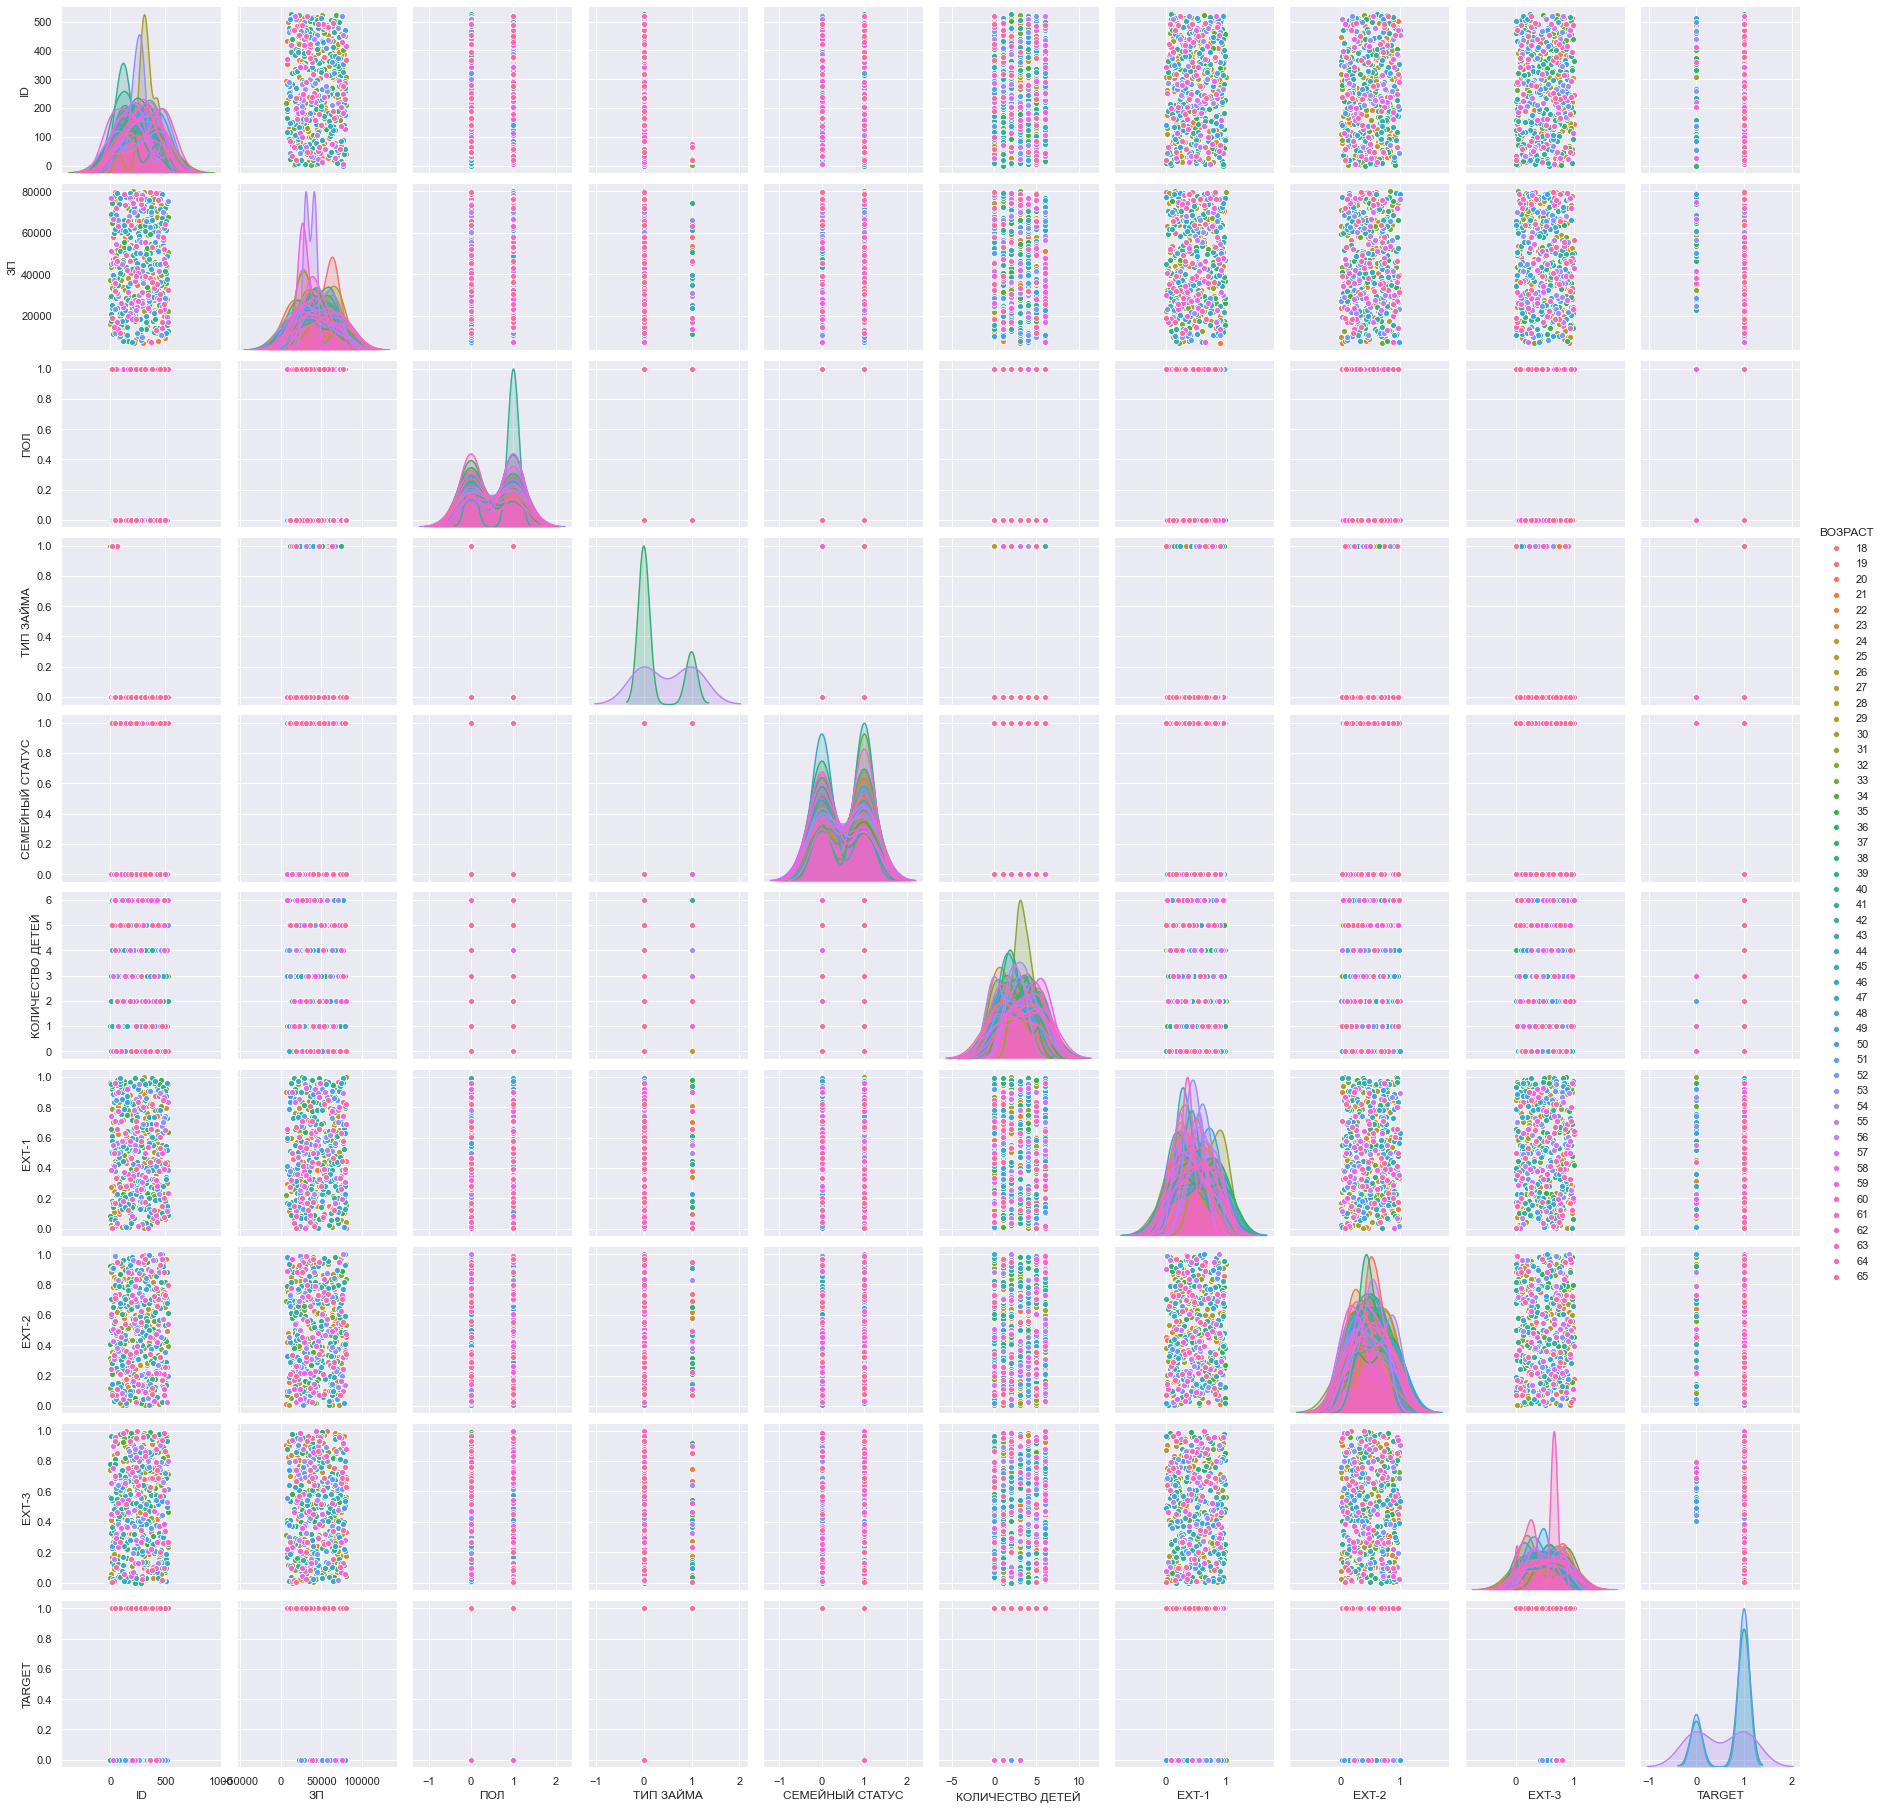

In [11]:
sns.pairplot(df, hue="ВОЗРАСТ")

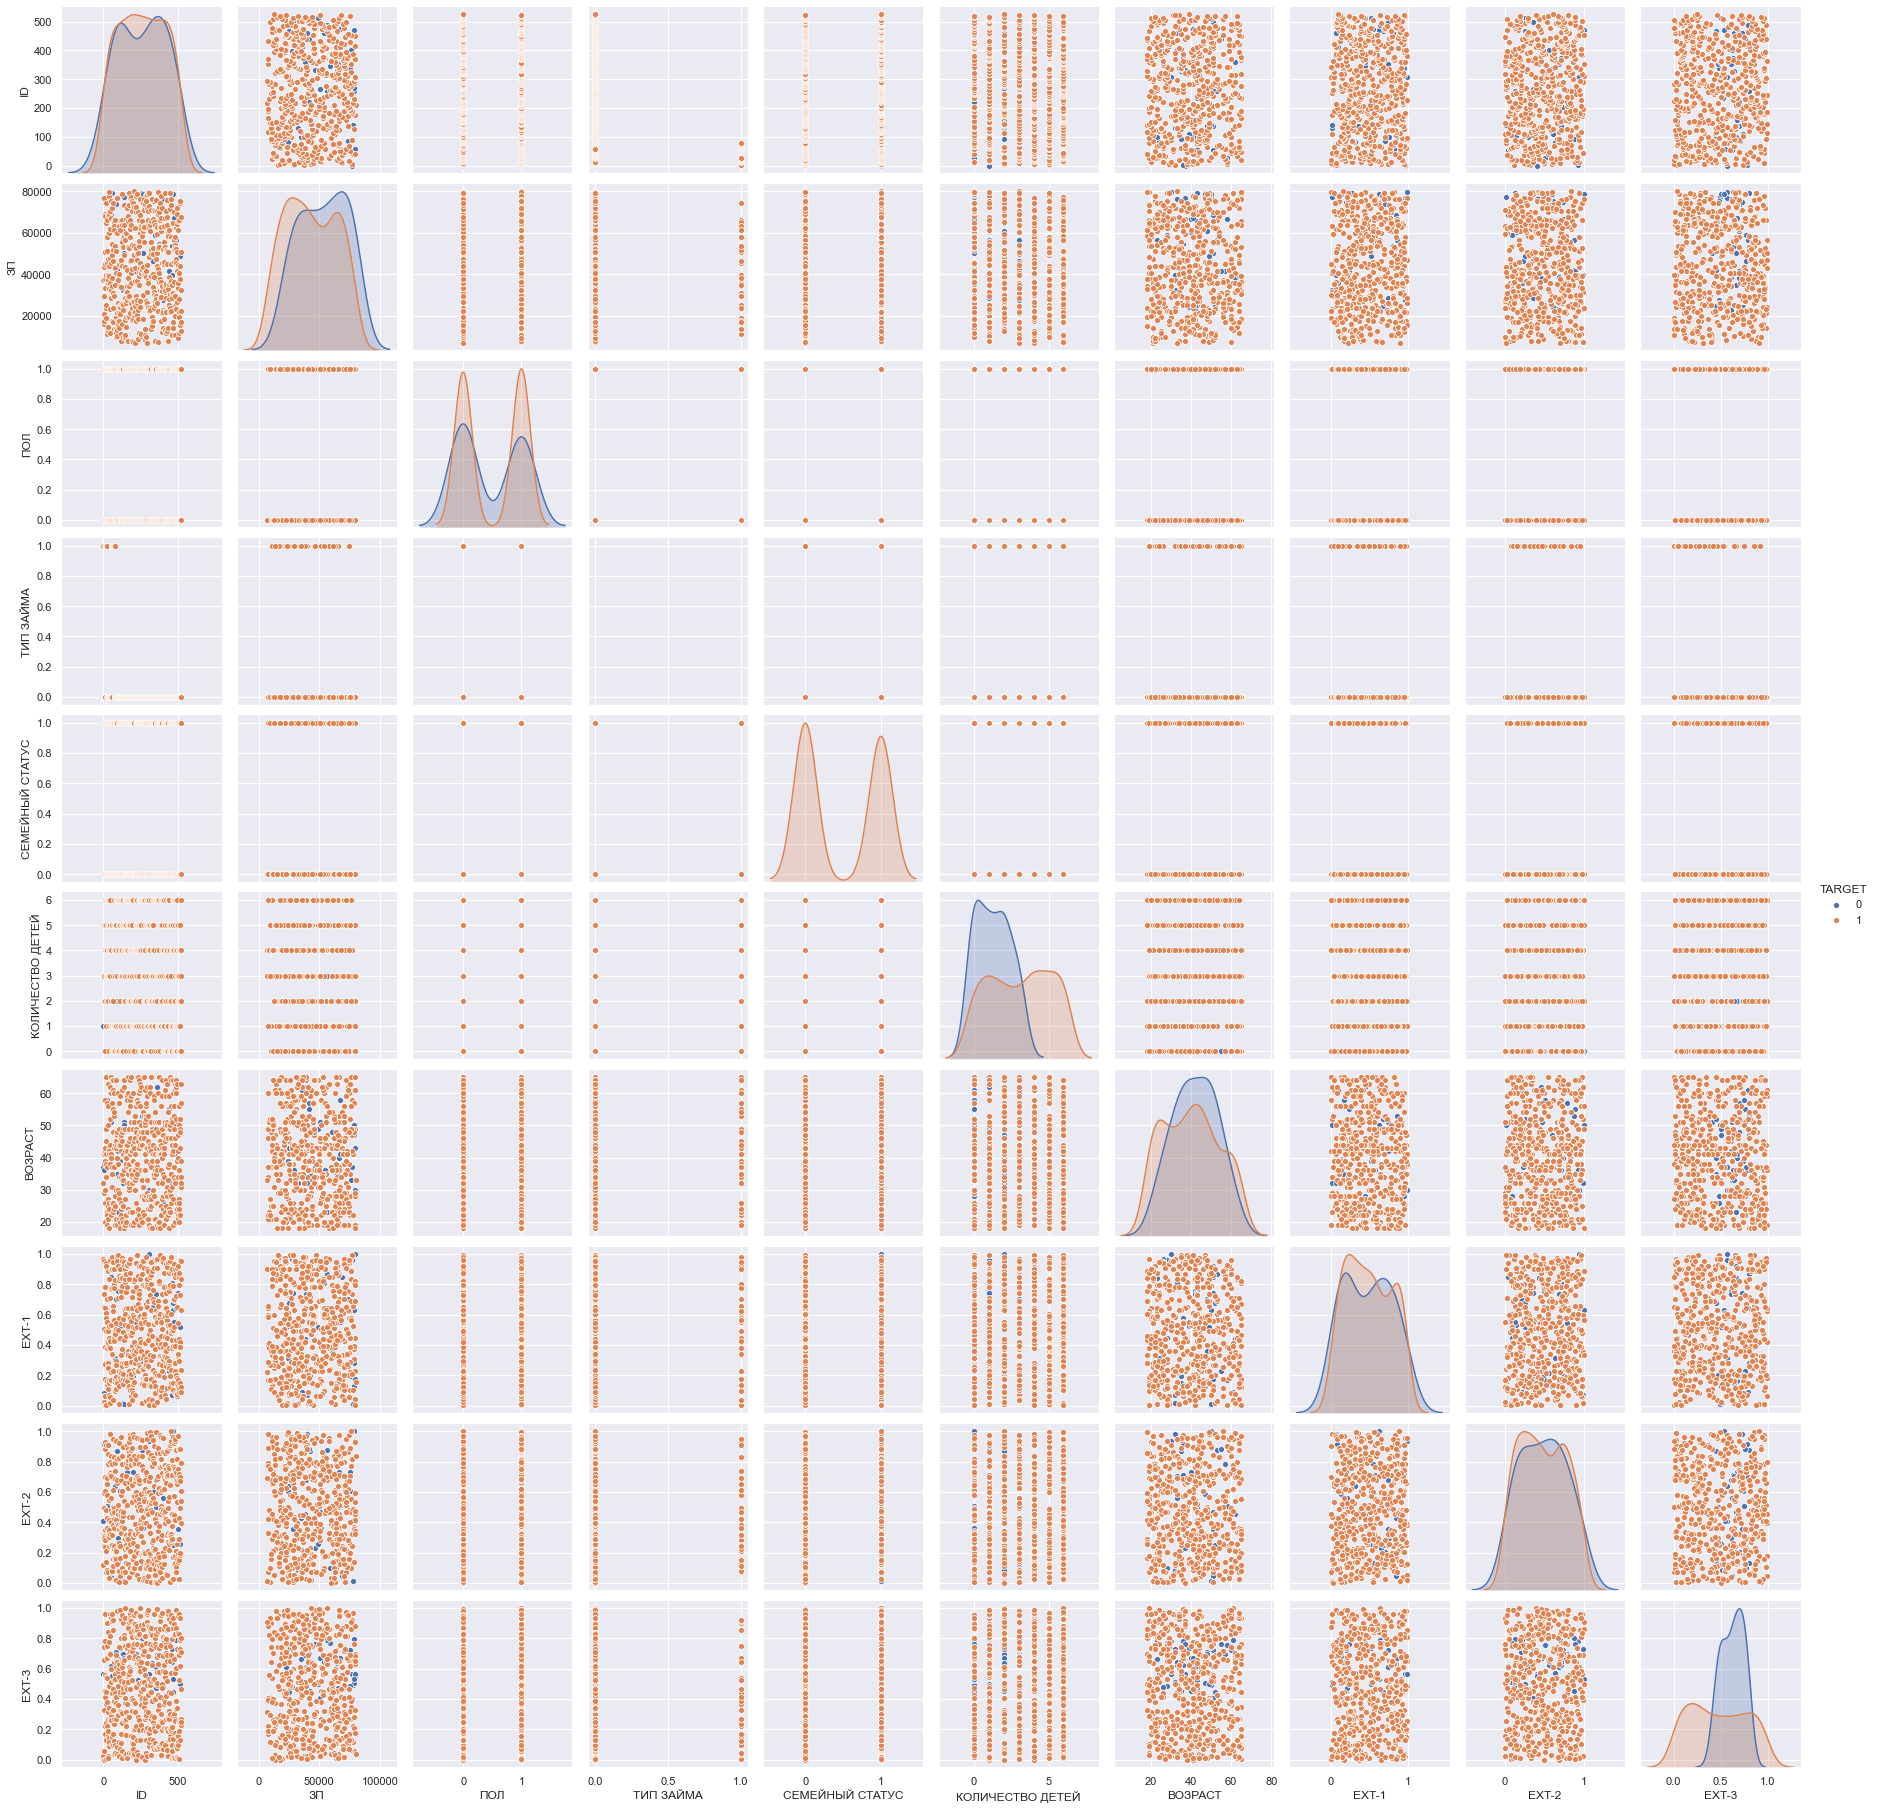

In [12]:
sns.pairplot(df, hue="TARGET")

In [62]:
#проверяем как работает (доля правильных ответов)
tree.score(x_test, y_test)

0.9339622641509434

In [63]:
tree.score(x_train, y_train)

0.9833333333333333

In [118]:
#переводим дерево в формат dot
export_graphviz(tree, out_file = 'treecredit.dot', feature_names = x.columns, filled = True)

In [119]:
! dot -Tpng treecredit.dot -o treecredit.png

In [120]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [121]:
conda install graphviz

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




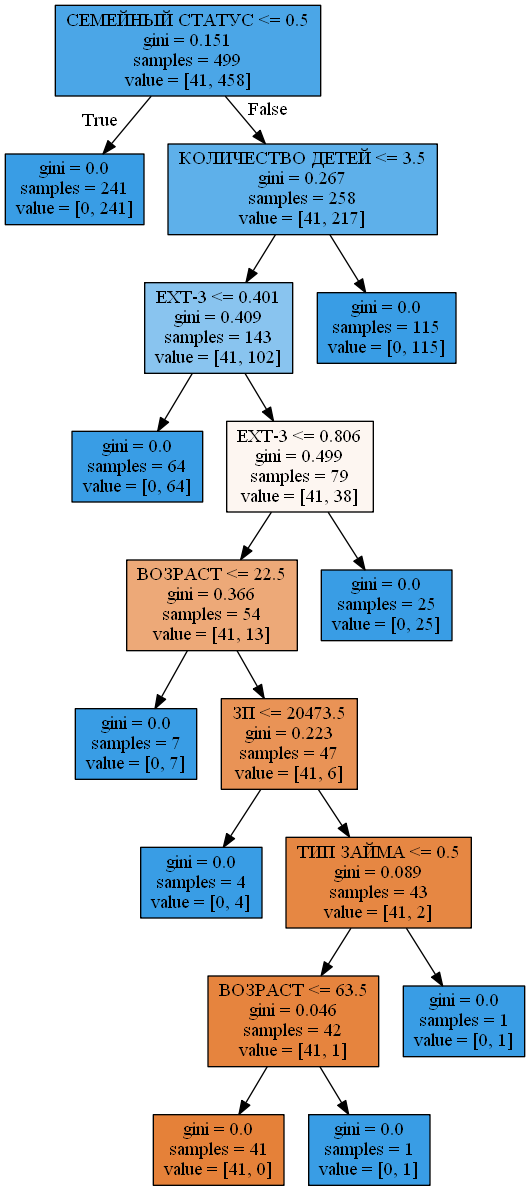

In [122]:
from PIL import Image
Image.open('treecredit.png')